## Ánalise da dados de saúde mental

#### Carregando e combinando os dados

In [30]:
import pandas as pd
import os

# Caminho para a pasta com os arquivos CSV
data_path = "../data"

# Listando todos os arquivos CSV na pasta
csv_files = [i for i in os.listdir(data_path) if i.endswith('.csv')]

# Carregando e combinando os dados
df = [pd.read_csv(os.path.join(data_path, file)) for file in csv_files]
osmi_df = pd.concat(df, ignore_index=True)

# Exibindo as 5 primeiras linhas do DataFrame combinado
print("Dados combinados:")
osmi_df.head()

Dados combinados:


,A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?,"A sua empresa ja debateu saude mental formalmente (por exemplo, via um programa de concientizacao corporativo)?",A sua empresa oferece recursos para aprender mais sobre saude mental e alternativas para buscar ajuda?,A sua privacidade eh protegida se voce optar por um tratamento de saude mental oferecido pela sua empresa?,"Caso voce sinta a necessidade de solicitar uma licenca do trabalho devido a saude mental, quao facil ou dificil seria fazer essa solicitacao?",Voce se sentiria confortavel discutindo uma questao de saude mental com o seu chefe direto?,Voce se sentiria confortavel discutindo uma questao de saude mental com os seus pares?,O quao propenso voce estaria em dividir com amigos e familiares que voce possui uma doenca mental?,"Se voce revelou uma doenca mental para um cliente ou contato de negocio, como isso afetou voce e/ou o relacionamento?","Se voce revelou uma doenca mental para um para par ou funcionario, como isso afetou voce e/ou o relacionamento?",Idade,Genero,Qual pais voce reside?,Qual pais voce trabalha?,Voce ja foi diagnosticado com uma doenca mental?,Voce ja procurou tratamento profissional para uma doenca mental?
0,Nao elegivel,Nao,Nao,Eu nao sei,Muito Facil,Sim,Talvez,Um pouco aberto,NaN,NaN,39.0,Masculino,United Kingdom,United Kingdom,Sim,Nao
1,Nao,Sim,Sim,Sim,Facil,Sim,Talvez,Um pouco aberto,NaN,NaN,29.0,masculino,United States,United States,Sim,Sim
2,Nao,Nao,Nao,Eu nao sei,Nem facil nem dificil,Talvez,Talvez,Um pouco aberto,NaN,NaN,38.0,Masculino,United Kingdom,United Kingdom,Nao,Sim
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutro,Nao tenho certeza,Nao tenho certeza,43.0,masculino,United Kingdom,United Kingdom,Sim,Sim
4,Sim,Nao,Nao,Nao,Nem facil nem dificil,Nao,Talvez,Um pouco aberto,NaN,NaN,43.0,Feminino,United States,United States,Sim,Sim


#### Explorando os dados

Informações gerais

In [31]:
# Informações sobre o DataFrame
osmi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Data columns (total 16 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?                                                 2315 non-null   object 
 1   A sua empresa ja debateu saude mental formalmente (por exemplo, via um programa de concientizacao corporativo)?                                2315 non-null   object 
 2   A sua empresa oferece recursos para aprender mais sobre saude mental e alternativas para buscar ajuda?                                         2315 non-null   object 
 3   A sua privacidade eh protegi

#### Realizando a limpeza dos dados

##### Renomeando colunas

Para facilitar a manipulação, as colunas foram renomeadas com nomes mais curtos e intuitivos, pois as colunas possuem nomes extensos.

In [32]:
# Renomeando colunas
osmi_df.rename(columns={
    "A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?": "beneficios_saude_mental",
    "A sua empresa ja debateu saude mental formalmente (por exemplo, via um programa de concientizacao corporativo)?": "debate_saude_mental",
    "A sua empresa oferece recursos para aprender mais sobre saude mental e alternativas para buscar ajuda?": "recursos_saude_mental",
    "A sua privacidade eh protegida se voce optar por um tratamento de saude mental oferecido pela sua empresa?": "privacidade_tratamento",
    "Caso voce sinta a necessidade de solicitar uma licenca do trabalho devido a saude mental, quao facil ou dificil seria fazer essa solicitacao?": "facilidade_licenca",
    "Voce se sentiria confortavel discutindo uma questao de saude mental com o seu chefe direto?": "conforto_com_chefe",
    "Voce se sentiria confortavel discutindo uma questao de saude mental com os seus pares?": "conforto_com_pares",
    "O quao propenso voce estaria em dividir com amigos e familiares que voce possui uma doenca mental?": "propensao_dividir_amigos",
    "Se voce revelou uma doenca mental para um cliente ou contato de negocio, como isso afetou voce e/ou o relacionamento?": "impacto_cliente",
    "Se voce revelou uma doenca mental para um para par ou funcionario, como isso afetou voce e/ou o relacionamento?": "impacto_funcionario",
    "Idade": "idade",
    "Genero": "genero",
    "Qual pais voce reside?": "pais_residencia",
    "Qual pais voce trabalha?": "pais_trabalho",
    "Voce ja foi diagnosticado com uma doenca mental?": "diagnostico_mental",
    "Voce ja procurou tratamento profissional para uma doenca mental?": "tratamento_mental"
}, inplace=True)

# Conferindo nomes após modificação
print(osmi_df.columns)


Index(['beneficios_saude_mental', 'debate_saude_mental',
       'recursos_saude_mental', 'privacidade_tratamento', 'facilidade_licenca',
       'conforto_com_chefe', 'conforto_com_pares', 'propensao_dividir_amigos',
       'impacto_cliente', 'impacto_funcionario', 'idade', 'genero',
       'pais_residencia', 'pais_trabalho', 'diagnostico_mental',
       'tratamento_mental'],
      dtype='object')


##### Lidando com valores nulos

In [33]:
osmi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   beneficios_saude_mental   2315 non-null   object 
 1   debate_saude_mental       2315 non-null   object 
 2   recursos_saude_mental     2315 non-null   object 
 3   privacidade_tratamento    2315 non-null   object 
 4   facilidade_licenca        2315 non-null   object 
 5   conforto_com_chefe        2315 non-null   object 
 6   conforto_com_pares        2315 non-null   object 
 7   propensao_dividir_amigos  2739 non-null   object 
 8   impacto_cliente           196 non-null    object 
 9   impacto_funcionario       424 non-null    object 
 10  idade                     2739 non-null   float64
 11  genero                    2719 non-null   object 
 12  pais_residencia           2739 non-null   object 
 13  pais_trabalho             2739 non-null   object 
 14  diagnost

Como é possível observer, o arquivo possui 2739 linhas de dados, porém boa parte das colunas têm menos valores não nulos e isso significa que esses atrubutos possuem valores ausentes.

In [34]:
print("Número de valores faltantes:")
for col in osmi_df.columns:
    n_MV = osmi_df[col].isna().sum()
    print('- {}:{}'.format(col,n_MV))

Número de valores faltantes:
- beneficios_saude_mental:424
- debate_saude_mental:424
- recursos_saude_mental:424
- privacidade_tratamento:424
- facilidade_licenca:424
- conforto_com_chefe:424
- conforto_com_pares:424
- propensao_dividir_amigos:0
- impacto_cliente:2543
- impacto_funcionario:2315
- idade:0
- genero:20
- pais_residencia:0
- pais_trabalho:0
- diagnostico_mental:812
- tratamento_mental:0


Analisando toda a base ao mesmo tempo para identificar padrões ou clusters nos valores ausentes.

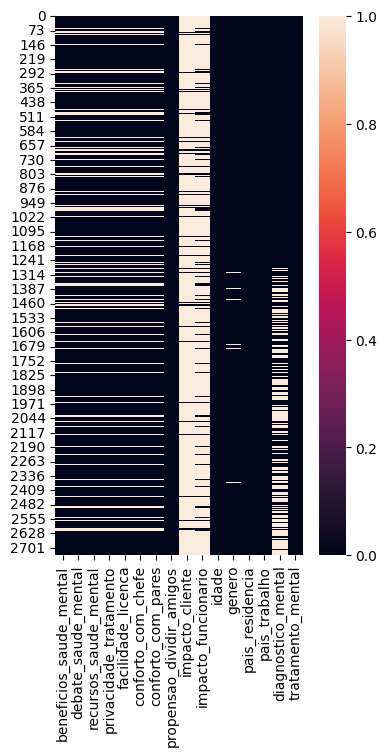

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,7))
sns.heatmap(osmi_df.isna())
plt.show()

Avaliando a quantidade de valores ausentes

> Menos que 5% ausentes: excluir direta provavelmente não terá impacto significativo.

> 5% - 30% ausentes: considerar métodos de imputação, como preenchimento com moda, mediana, ou categóricos como "Não informado".

> Maior que 30% ausentes: reavaliar a utilidade da coluna na análise; talvez seja melhor excluí-la.

In [36]:
print("Percentual de valores ausentes:")
percentual_ausentes = (osmi_df.isnull().sum() / len(osmi_df)) * 100
print(percentual_ausentes)


Percentual de valores ausentes:
beneficios_saude_mental     15.480102
debate_saude_mental         15.480102
recursos_saude_mental       15.480102
privacidade_tratamento      15.480102
facilidade_licenca          15.480102
conforto_com_chefe          15.480102
conforto_com_pares          15.480102
propensao_dividir_amigos     0.000000
impacto_cliente             92.844104
impacto_funcionario         84.519898
idade                        0.000000
genero                       0.730194
pais_residencia              0.000000
pais_trabalho                0.000000
diagnostico_mental          29.645856
tratamento_mental            0.000000
dtype: float64


Colunas com valores ausentes moderados (~15%)

> As colunas beneficios_saude_mental, debate_saude_mental, recursos_saude_mental, privacidade_tratamento, facilidade_licenca, conforto_com_chefe, conforto_com_pares têm ~15% de valores ausentes.

In [37]:
variaveis_categoricas = [
    'beneficios_saude_mental', 'debate_saude_mental',
    'recursos_saude_mental', 'privacidade_tratamento',
    'facilidade_licenca', 'conforto_com_chefe', 'conforto_com_pares'
]
osmi_df[variaveis_categoricas] = osmi_df[variaveis_categoricas].fillna('Não Informado')

Colunas com muitos valores ausentes (> 80%)

> As colunas impacto_cliente (92.8%) e impacto_funcionario (84.5%) têm um alto percentual de valores ausentes, o que torna a análise dessas colunas pouco confiável.

In [38]:
osmi_df.drop(columns=['impacto_cliente', 'impacto_funcionario'], inplace=True)

Colunas com valores ausentes baixos (< 1%)

> A coluna genero (0.73%) tem poucos valores ausentes.

In [39]:
osmi_df['genero'] = osmi_df['genero'].fillna('Não informado')

Coluna com valores ausentes moderados (~30%)

> A coluna diagnostico_mental (29.6%) possui um percentual maior de valores ausentes. Será preenchido com "Não informado" para evitar perda de dados.

In [40]:
osmi_df['diagnostico_mental'] = osmi_df['diagnostico_mental'].fillna('Não informado')

In [41]:
print("Verificando aquivo após modificações:")
osmi_df.info()

Verificando aquivo após modificações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   beneficios_saude_mental   2739 non-null   object 
 1   debate_saude_mental       2739 non-null   object 
 2   recursos_saude_mental     2739 non-null   object 
 3   privacidade_tratamento    2739 non-null   object 
 4   facilidade_licenca        2739 non-null   object 
 5   conforto_com_chefe        2739 non-null   object 
 6   conforto_com_pares        2739 non-null   object 
 7   propensao_dividir_amigos  2739 non-null   object 
 8   idade                     2739 non-null   float64
 9   genero                    2739 non-null   object 
 10  pais_residencia           2739 non-null   object 
 11  pais_trabalho             2739 non-null   object 
 12  diagnostico_mental        2739 non-null   object 
 13  tratamento_mental        

In [42]:
osmi_df.head(10)

,beneficios_saude_mental,debate_saude_mental,recursos_saude_mental,privacidade_tratamento,facilidade_licenca,conforto_com_chefe,conforto_com_pares,propensao_dividir_amigos,idade,genero,pais_residencia,pais_trabalho,diagnostico_mental,tratamento_mental
0,Nao elegivel,Nao,Nao,Eu nao sei,Muito Facil,Sim,Talvez,Um pouco aberto,39.0,Masculino,United Kingdom,United Kingdom,Sim,Nao
1,Nao,Sim,Sim,Sim,Facil,Sim,Talvez,Um pouco aberto,29.0,masculino,United States,United States,Sim,Sim
2,Nao,Nao,Nao,Eu nao sei,Nem facil nem dificil,Talvez,Talvez,Um pouco aberto,38.0,Masculino,United Kingdom,United Kingdom,Nao,Sim
3,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado,Neutro,43.0,masculino,United Kingdom,United Kingdom,Sim,Sim
4,Sim,Nao,Nao,Nao,Nem facil nem dificil,Nao,Talvez,Um pouco aberto,43.0,Feminino,United States,United States,Sim,Sim
5,Sim,Nao,Sim,Sim,Facil,Sim,Talvez,Um pouco aberto,42.0,Masculino,United Kingdom,United Kingdom,Nao,Sim
6,Eu nao sei,Nao,Nao,Eu nao sei,Facil,Sim,Talvez,"Nao aplicavel, eu nao tenho uma doenca mental",30.0,M,United States,United States,Nao,Nao
7,Sim,Nao,Sim,Sim,Muito Facil,Sim,Talvez,Um pouco aberto,37.0,feminino,United States,United States,Sim,Sim
8,Eu nao sei,Nao,Nao,Eu nao sei,Muito dificil,Talvez,Sim,Um pouco aberto,44.0,Feminino,United States,United States,Sim,Sim
9,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado,Muito aberto,30.0,Masculino,United States,United States,Sim,Sim


##### Padronizando os dados

Inspecionando os valores únicos de cada coluna categórica


In [43]:
for col in osmi_df.columns:
    print(f"Coluna: {col}")
    print(osmi_df[col].unique())
    print("-" * 50)

Coluna: beneficios_saude_mental
['Nao elegivel' 'Nao' 'Não Informado' 'Sim' 'Eu nao sei'
 'Nao elegivel - NA']
--------------------------------------------------
Coluna: debate_saude_mental
['Nao' 'Sim' 'Não Informado' 'Eu nao sei']
--------------------------------------------------
Coluna: recursos_saude_mental
['Nao' 'Sim' 'Não Informado' 'Eu nao sei']
--------------------------------------------------
Coluna: privacidade_tratamento
['Eu nao sei' 'Sim' 'Não Informado' 'Nao']
--------------------------------------------------
Coluna: facilidade_licenca
['Muito Facil' 'Facil' 'Nem facil nem dificil' 'Não Informado'
 'Muito dificil' 'Um pouco dificil' 'Eu nao sei' 'Dificil']
--------------------------------------------------
Coluna: conforto_com_chefe
['Sim' 'Talvez' 'Não Informado' 'Nao']
--------------------------------------------------
Coluna: conforto_com_pares
['Talvez' 'Não Informado' 'Sim' 'Nao']
--------------------------------------------------
Coluna: propensao_dividir_amigos

Colunas que requerem padronização

Com base nos resultados, as colunas beneficios_saude_mental, debate_saude_mental, recursos_saude_mental, privacidade_tratamento, serão tratadas.

> Problemas: valores como "Nao", "Nao elegivel", "Não Informado", "Eu nao sei" precisam ser unificados.

Função de padronização para múltiplas colunas

In [44]:
def padronizar_coluna(df, coluna, mapeamento):
    """Padroniza os valores em uma coluna com base em um dicionário de mapeamento."""
    df[coluna] = df[coluna].replace(mapeamento)

Definindo os mapeamentos para as colunas com problemas

In [45]:
# Dicionários de mapeamento
mapeamento_sim_nao = {
    "Sim": "Sim", 
    "Nao": "Não", 
    "Nao elegivel": "Não aplicável", 
    "Nao elegivel - NA": "Não aplicável", 
    "Não Informado": "Não informado", 
    "Eu nao sei": "Não informado"
}

mapeamento_facilidade = {
    "Muito Facil": "Muito fácil",
    "Facil": "Fácil",
    "Nem facil nem dificil": "Moderado",
    "Um pouco dificil": "Difícil",
    "Dificil": "Difícil",
    "Muito dificil": "Muito difícil",
    "Não Informado": "Não informado",
    "Eu nao sei": "Não informado"
}

mapeamento_genero = {
    "masculino": "Masculino", "M": "Masculino",
    "F": "Feminino", "feminino": "Feminino", "Mulher": "Feminino",
    "não é da sua conta": "Não informado", "Não Informado": "Não informado"
}


Padronizando as colunas no DataFrame

> Tratando colunas beneficios_saude_mental, debate_saude_mental, recursos_saude_mental, privacidade_tratamento e diagnostico_mental

In [46]:
# Aplicando padronização
colunas_sim_nao = [
    "beneficios_saude_mental", "debate_saude_mental", "recursos_saude_mental",
    "privacidade_tratamento", "diagnostico_mental"
]

for col in colunas_sim_nao:
    padronizar_coluna(osmi_df, col, mapeamento_sim_nao)

padronizar_coluna(osmi_df, "facilidade_licenca", mapeamento_facilidade)
padronizar_coluna(osmi_df, "genero", mapeamento_genero)


> Tratando coluna propensao_dividir_amigos

In [47]:
mapeamento_propensao = {
    "Definitivamente nao": 0,
    "Nao muito aberto": 2,
    "Neutro": 5,
    "Um pouco aberto": 6,
    "Muito aberto": 8,
    "Nao aplicavel, eu nao tenho uma doenca mental": pd.NA
}

osmi_df["propensao_dividir_amigos"] = osmi_df["propensao_dividir_amigos"].replace(mapeamento_propensao)

> Tratando colunas diagnostico_mental e tratamento_mental

In [48]:
# Dicionário de mapeamento
mapeamento_diagnostico_tratamento = {
    "Sim": "Sim",
    "Nao": "Não",
    "Não informado": None
}

# Padronizando as colunas
osmi_df["diagnostico_mental"] = osmi_df["diagnostico_mental"].map(mapeamento_diagnostico_tratamento)
osmi_df["tratamento_mental"] = osmi_df["tratamento_mental"].map(mapeamento_diagnostico_tratamento)

# Verificando resultados
print(osmi_df["diagnostico_mental"].unique())
print(osmi_df["tratamento_mental"].unique())

['Sim' nan None]
['Não' 'Sim']


In [49]:
# Verificando e corrigindo valores nulos em diagnostico_mental
osmi_df["diagnostico_mental"] = osmi_df["diagnostico_mental"].map(mapeamento_diagnostico_tratamento)

# Verificando novamente os valores únicos
print("Valores únicos em 'diagnostico_mental':", osmi_df["diagnostico_mental"].unique())
print("Valores únicos em 'tratamento_mental':", osmi_df["tratamento_mental"].unique())

# Forçando os valores ausentes para serem apenas NaN
osmi_df["diagnostico_mental"] = osmi_df["diagnostico_mental"].replace({None: pd.NA})

Valores únicos em 'diagnostico_mental': ['Sim' nan]
Valores únicos em 'tratamento_mental': ['Não' 'Sim']


In [50]:
# Valores finais únicos
print("Diagnóstico mental:", osmi_df["diagnostico_mental"].unique())
print("Tratamento mental:", osmi_df["tratamento_mental"].unique())

# Contagem de valores nulos
print("Valores ausentes em 'diagnostico_mental':", osmi_df["diagnostico_mental"].isnull().sum())

Diagnóstico mental: ['Sim' <NA>]
Tratamento mental: ['Não' 'Sim']
Valores ausentes em 'diagnostico_mental': 1441


> Tranado colunas conforto_com_chefe e conforto_com_pares

In [51]:
osmi_df[['conforto_com_chefe', 'conforto_com_pares']] = osmi_df[
    ['conforto_com_chefe', 'conforto_com_pares']
].replace({
  "Nao": "Não",
  "Não Informado": "Não informado"
  })


> Tratando coluna genero

In [54]:
def padronizar_genero(valor):
    if pd.isna(valor):
        return 'Não informado'
    valor = valor.strip().lower()  # Normalizar o texto
    if any(palavra in valor for palavra in ['masc', 'homem', 'cara', 'man']):
        return 'Masculino'
    elif any(palavra in valor for palavra in ['fem', 'mulher', 'ela', 'lady']):
        return 'Feminino'
    elif any(palavra in valor for palavra in ['não binário', 'fluido', 'queer', 'outro', 'sem gênero', 'unicórnio']):
        return 'Não-binário/Outro'
    elif 'não informado' in valor or valor in ['nenhum', '\\----', 'contextual']:
        return 'Não informado'
    else:
        return 'Não informado'

osmi_df['genero'] = osmi_df['genero'].apply(padronizar_genero)

> Tratando coluna idade

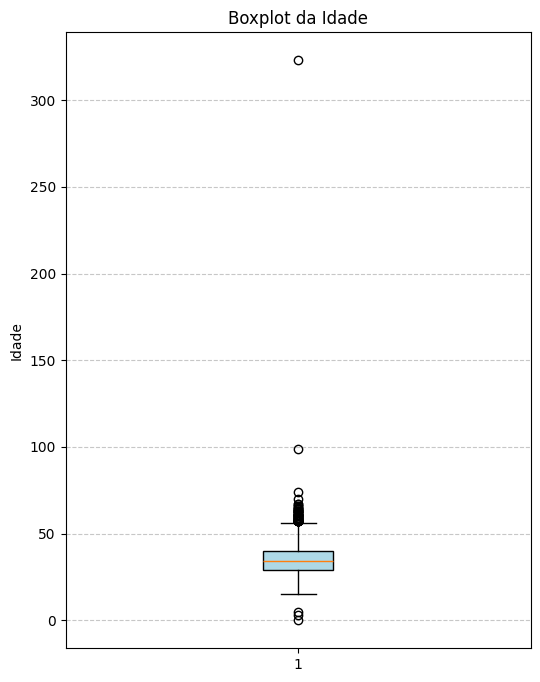

In [56]:
plt.figure(figsize=(6, 8))
plt.boxplot(osmi_df["idade"].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot da Idade")
plt.ylabel("Idade")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Obs: O boxplot gerado mostra a distribuição dos valores na coluna "idade". É possível identificar valores discrepantes (outliers), como os extremos 0, 3, 5 e 323, que estão distantes do corpo principal dos dados.

Será adotado o seguinte critério:

- Idade mínima razoável: 18 (idade mínima legal para trabalhar em muitos países, mas pode ser ajustada se necessário).
- Idade máxima razoável: 100 (limite superior prático para a população em geral).

In [57]:
# Filtrando idades entre 18 e 100
osmi_df = osmi_df[osmi_df["idade"].between(18, 100)]

# Verificando o resultado
print("Valores únicos em 'idade' após a filtragem:", osmi_df["idade"].unique())
print("Contagem de valores ausentes em 'idade':", osmi_df["idade"].isnull().sum())

Valores únicos em 'idade' após a filtragem: [39. 29. 38. 43. 42. 30. 37. 44. 28. 34. 35. 52. 32. 25. 31. 26. 33. 27.
 36. 40. 46. 41. 45. 19. 21. 24. 23. 51. 48. 55. 50. 22. 49. 20. 54. 47.
 56. 57. 63. 99. 61. 62. 53. 58. 66. 59. 65. 74. 70. 18. 64. 60. 67.]
Contagem de valores ausentes em 'idade': 0


##### Confirmando limpeza

Verificando outras colunas

In [58]:
for col in osmi_df.columns:
    print(f"Coluna: {col}")
    print(osmi_df[col].unique())
    print("-" * 50)


Coluna: beneficios_saude_mental
['Não aplicável' 'Não' 'Não informado' 'Sim']
--------------------------------------------------
Coluna: debate_saude_mental
['Não' 'Sim' 'Não informado']
--------------------------------------------------
Coluna: recursos_saude_mental
['Não' 'Sim' 'Não informado']
--------------------------------------------------
Coluna: privacidade_tratamento
['Não informado' 'Sim' 'Não']
--------------------------------------------------
Coluna: facilidade_licenca
['Muito fácil' 'Fácil' 'Moderado' 'Não informado' 'Muito difícil'
 'Difícil']
--------------------------------------------------
Coluna: conforto_com_chefe
['Sim' 'Talvez' 'Não informado' 'Não']
--------------------------------------------------
Coluna: conforto_com_pares
['Talvez' 'Não informado' 'Sim' 'Não']
--------------------------------------------------
Coluna: propensao_dividir_amigos
[6 5 <NA> 8 0 2 4 10 3 9 7 1]
--------------------------------------------------
Coluna: idade
[39. 29. 38. 43. 42. 

##### Respondendo as perguntas do estudo

1. Existe uma diferença significativa de saúde mental entre os gêneros de colaboradores ao longo do tempo em que a pesquisa foi realizada?

In [59]:
print(osmi_df.groupby(['genero', 'diagnostico_mental']).size())

genero             diagnostico_mental
Feminino           Sim                   429
Masculino          Sim                   735
Não informado      Sim                    93
Não-binário/Outro  Sim                    40
dtype: int64


> A análise mostra que os diagnósticos de saúde mental positivos (Sim) estão distribuídos entre os gêneros conforme a seguinte contagem:
>
>- Feminino: 429 diagnósticos
>- Masculino: 735 diagnósticos
>- Não informado: 93 diagnósticos
>- Não-binário/Outro: 40 diagnósticos.
>
> Essa distribuição sugere que há uma diferença na quantidade de diagnósticos entre os gêneros. 

2. Existe uma diferença significativa de quem busca tratamento entre os gêneros de colaboradores ao longo do tempo em que a pesquisa foi realizada?

In [64]:
# Agrupando por gênero e tratamento de saúde mental
tratamento_por_genero = osmi_df.groupby(['genero', 'tratamento_mental']).size().unstack()

# Calculando as proporções
proporcoes_tratamento = tratamento_por_genero.div(tratamento_por_genero.sum(axis=1), axis=0) * 100

print("Proporções de tratamento de saúde mental por gênero (%):")
print(proporcoes_tratamento)


Proporções de tratamento de saúde mental por gênero (%):
tratamento_mental        Não        Sim
genero                                 
Feminino           25.546448  74.453552
Masculino          43.671608  56.328392
Não informado      43.216080  56.783920
Não-binário/Outro  12.500000  87.500000


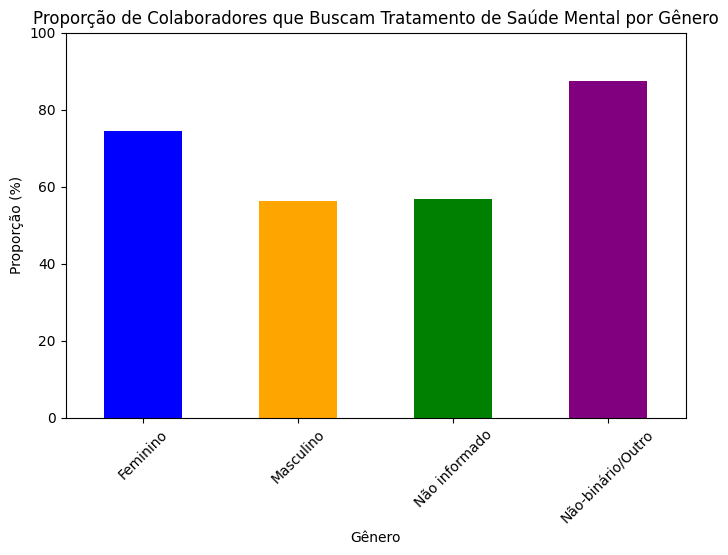

In [65]:
# Plotando proporções
proporcoes_tratamento['Sim'].plot(kind='bar', color=['blue', 'orange', 'green', 'purple'], figsize=(8, 5))

# Ajustes no gráfico
plt.title('Proporção de Colaboradores que Buscam Tratamento de Saúde Mental por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Proporção (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()


> Com base no resultado das proporções, temos as seguintes observações:
>
>- Feminino: 74,45% buscam tratamento.
>- Masculino: 56,33% buscam tratamento.
>- Não informado: 56,78% buscam tratamento.
>- Não-binário/Outro: 87,50% buscam tratamento.

3. Existe uma diferença significativa de saúde mental entre as idades dos colaboradores ao longo do tempo em que a pesquisa foi realizada?

Idades - Com diagnóstico:
count    1297.000000
mean       34.878180
std         8.595719
min        19.000000
25%        29.000000
50%        34.000000
75%        39.000000
max        99.000000
Name: idade, dtype: float64

Idades - Sem diagnóstico:
count    1436.000000
mean       34.888579
std         8.547069
min        18.000000
25%        29.000000
50%        34.000000
75%        40.000000
max        74.000000
Name: idade, dtype: float64


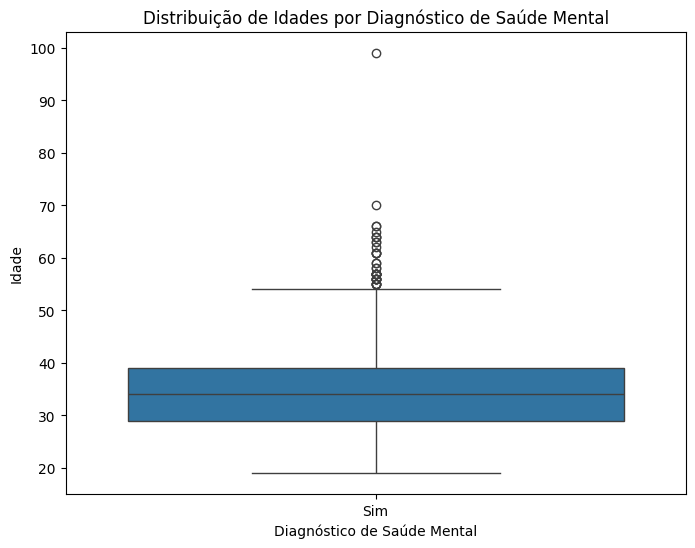

In [70]:
# Separar grupos por diagnóstico de saúde mental
idade_com_diagnostico = osmi_df[osmi_df['diagnostico_mental'] == 'Sim']['idade']
idade_sem_diagnostico = osmi_df[osmi_df['diagnostico_mental'].isna()]['idade']

# Estatísticas descritivas
print("Idades - Com diagnóstico:")
print(idade_com_diagnostico.describe())
print("\nIdades - Sem diagnóstico:")
print(idade_sem_diagnostico.describe())

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=osmi_df, x='diagnostico_mental', y='idade')
plt.title('Distribuição de Idades por Diagnóstico de Saúde Mental')
plt.xlabel('Diagnóstico de Saúde Mental')
plt.ylabel('Idade')
plt.show()

> Os valores descritivos mostram que a idade média dos colaboradores com diagnóstico de saúde mental é 34,88 anos, enquanto para aqueles sem diagnóstico, a média é muito próxima, 34,89 anos. As distribuições possuem desvio padrão semelhante e mediana igual (34 anos). Esses números sugerem que não há uma diferença notável apenas observando as estatísticas descritivas.

4. Existe uma diferença significativa de quem busca tratamento entre as idades dos colaboradores ao longo do tempo em que a pesquisa foi realizada?

In [71]:
# Estatísticas descritivas
tratamento_sim = osmi_df[osmi_df['tratamento_mental'] == 'Sim']['idade']
tratamento_nao = osmi_df[osmi_df['tratamento_mental'] == 'Não']['idade']

# Estatísticas descritivas por grupo
print("Idades - Buscou tratamento:")
print(tratamento_sim.describe())

print("\nIdades - Não buscou tratamento:")
print(tratamento_nao.describe())

Idades - Buscou tratamento:
count    1688.000000
mean       35.171209
std         8.772279
min        18.000000
25%        29.000000
50%        34.000000
75%        40.000000
max        99.000000
Name: idade, dtype: float64

Idades - Não buscou tratamento:
count    1045.000000
mean       34.419139
std         8.211898
min        18.000000
25%        28.000000
50%        33.000000
75%        39.000000
max        63.000000
Name: idade, dtype: float64


>- As médias das idades são bem próximas (35.17 anos para quem buscou tratamento e 34.42 anos para quem não buscou), o que sugere que não há uma grande diferença de idade entre os dois grupos.
>- O desvio padrão também é similar, indicando uma distribuição de idades relativamente homogênea em ambos os grupos.
>- A faixa etária dos colaboradores que não buscaram tratamento parece ter um limite superior mais baixo (63 anos), enquanto o grupo que buscou tratamento pode ter idades mais altas, chegando até 99 anos.

5. Os funcionários de empresas que possuem benefícios de saúde para tratamento de saúde mental buscam mais tratamento?

In [72]:
# Agrupando os dados por 'beneficios_saude_mental' e 'tratamento_mental'
proporcao_tratamento_por_beneficio = osmi_df.groupby(['beneficios_saude_mental', 'tratamento_mental']).size().unstack(fill_value=0)

# Calculando a proporção de quem busca tratamento ('Sim') em relação ao total de registros para cada benefício de saúde mental
proporcao_tratamento_por_beneficio_percentual = proporcao_tratamento_por_beneficio.div(proporcao_tratamento_por_beneficio.sum(axis=1), axis=0) * 100

# Exibindo os resultados
print(proporcao_tratamento_por_beneficio_percentual)


tratamento_mental              Não        Sim
beneficios_saude_mental                      
Não                      46.258503  53.741497
Não aplicável            36.666667  63.333333
Não informado            46.028708  53.971292
Sim                      30.141287  69.858713


>- Funcionários que possuem benefícios de saúde mental ("Sim") são os que mais buscam tratamento, com 69.86% buscando tratamento.
>- Funcionários que não possuem benefícios de saúde mental ("Não") apresentam uma proporção menor de busca por tratamento, com 53.74% buscando tratamento.
>- Funcionários cujos benefícios são "não aplicáveis" ou não informados também têm uma proporção considerável de busca por tratamento (63.33% e 53.97%, respectivamente).

6. Existe uma diferença significativa de saúde mental entre países mais ricos (com um PIB elevado) no ano de 2016? 